<a href="https://colab.research.google.com/github/yeho99/STATISTICS/blob/main/5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 라이브러리 로드

In [ ]:
# 데이터 분석을 위한 pandas 라이브러리를 불러옵니다.
# 수치계산을 위한 numpy를 불러옵니다.
# 데이터 시각화를 위한 matplotlib, seaborn 을 불러옵니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(pd.__version__)
print(sns.__version__)

2.2.2
0.13.2


In [ ]:
# 0.11.0 버전에서 변화가 많으니 이 버전 이상을 사용해 주세요.
# !pip install seaborn --upgrade

## 데이터셋 불러오기

In [ ]:
# mpg 데이터셋을 불러옵니다.
# df
df=sns.load_dataset('mpg')
df.shape

(398, 9)

## 데이터셋 일부만 가져오기

In [ ]:
# head
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
# tail
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


## 요약하기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


##  결측치 보기

In [ ]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


## 기술통계

In [ ]:
# describe 를 통해 범주형 변수에 대한 기술통계를 보기
df.describe(include="object")

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


## 범주형 변수
### 범주형 데이터 유일값의 빈도수

In [ ]:
# nunique 값 구하기
df.nunique()

,0
mpg,129
cylinders,5
displacement,82
horsepower,93
weight,351
acceleration,95
model_year,13
origin,3
name,305


<Axes: xlabel='origin', ylabel='count'>

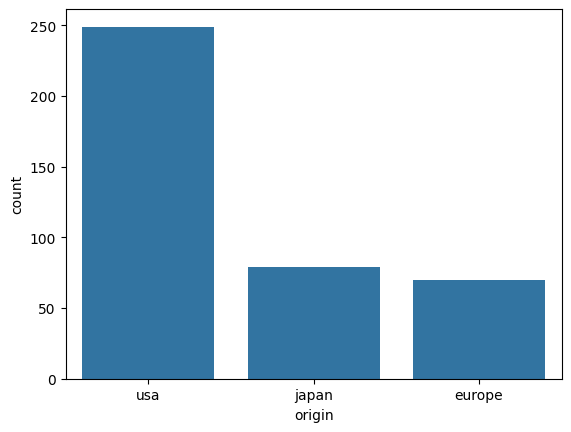

In [ ]:
# countplot 으로 origin 빈도수 시각화 하기
sns.countplot(data=df, x="origin")

### 1개 변수의 빈도수

In [ ]:
# origin 의 빈도수 구하기
# Reload the dataset to ensure df is a pandas DataFrame
df=sns.load_dataset('mpg')
df["origin"].value_counts()

,count
origin,
usa,249
japan,79
europe,70


### 2개 이상의 변수에 대한 빈도수

<Axes: xlabel='origin', ylabel='count'>

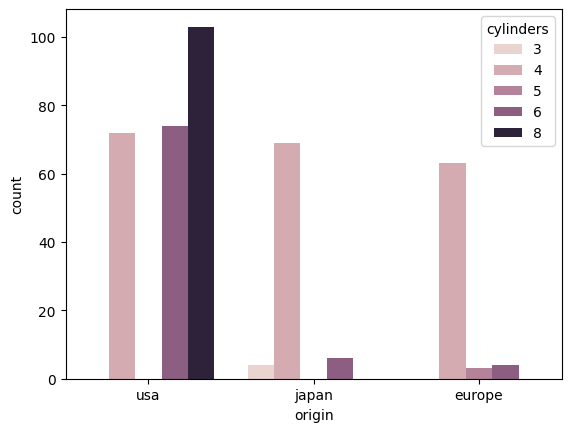

In [ ]:
# countplot 으로 origin 의 빈도수를 시각화 하고 cylinders 로 다른 색상으로 표현하기
sns.countplot(data=df, x="origin", hue="cylinders")

<Axes: xlabel='cylinders', ylabel='count'>

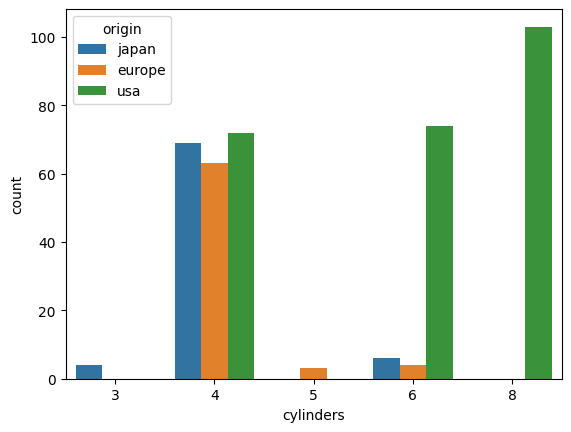

In [ ]:
# countplot 으로 cylinders 의 빈도수를 시각화 하고 origin 으로 다른 색상으로 표현하기
sns.countplot(data=df, x="cylinders",hue="origin")

In [ ]:
# pd.crosstab 으로 시각화한 값 직접 구하기
pd.crosstab(df["origin"],df["cylinders"])

cylinders,3,4,5,6,8
origin,,,,,
europe,0,63,3,4,0
japan,4,69,0,6,0
usa,0,72,0,74,103


### 범주형 vs 수치형 변수

/tmp/ipython-input-611140167.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="origin", y="mpg", estimator=np.mean, ci=None)


<Axes: xlabel='origin', ylabel='mpg'>

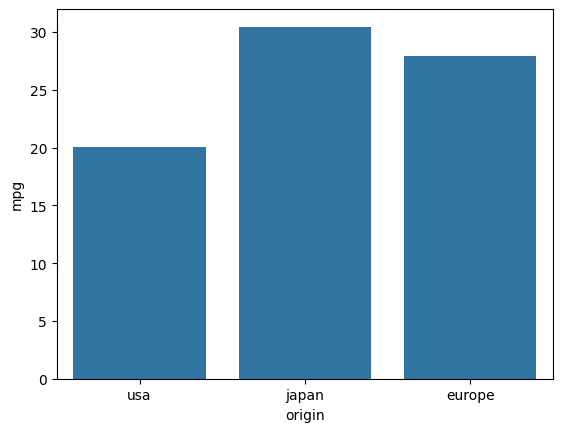

In [ ]:
# barplot 으로 origin 별 mpg 값 구하기
sns.barplot(data=df, x="origin", y="mpg", estimator=np.mean, ci=None)

### groupby 를 통한 연산

In [ ]:
# groupby를 통해 origin 별로 그룹화 하고 mpg 의 평균 구하기
df.groupby("origin")["mpg"].mean()

,mpg
origin,
europe,27.891429
japan,30.450633
usa,20.083534


### pivot table을 통한 연산

In [ ]:
# pivot_table 로 같은 값 구하기
pd.pivot_table(data=df, index="origin", values="mpg")

,mpg
origin,
europe,27.891429
japan,30.450633
usa,20.083534


/tmp/ipython-input-1230538783.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="origin", y="mpg",estimator=np.sum, ci=None)


<Axes: xlabel='origin', ylabel='mpg'>

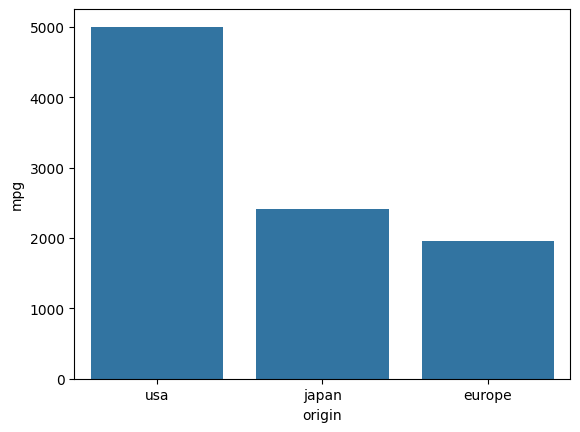

In [ ]:
# barplot 으로 합계 값 구하기
sns.barplot(data=df, x="origin", y="mpg",estimator=np.sum, ci=None)

/tmp/ipython-input-340329918.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="cylinders", y="mpg", estimator=np.sum, ci=None, hue="origin")


<Axes: xlabel='cylinders', ylabel='mpg'>

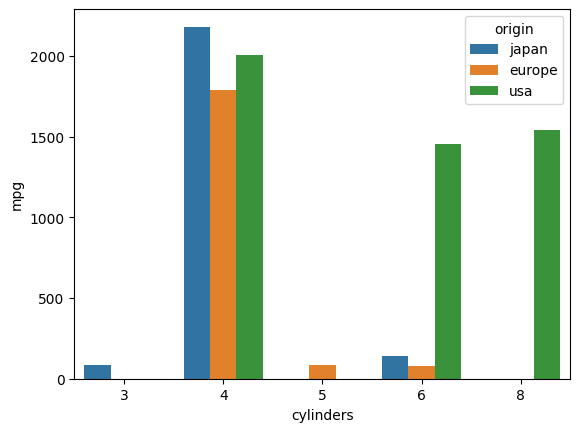

In [ ]:
# barplot 에 hue 를 사용하여 색상을 다르게 표현해 보기
sns.barplot(data=df, x="cylinders", y="mpg", estimator=np.sum, ci=None, hue="origin")

In [ ]:
# groupby 를 통해 위 시각화에 대한 값을 구하기
df.groupby(["cylinders","origin"])['mpg'].mean().unstack()

origin,europe,japan,usa
cylinders,,,
3,NaN,20.550000,NaN
4,28.411111,31.595652,27.840278
5,27.366667,NaN,NaN
6,20.100000,23.883333,19.663514
8,NaN,NaN,14.963107


In [ ]:
# pivot_table 를 통해 위 시각화에 대한 값을 구하기
pd.pivot_table(data=df, index="cylinders", columns="origin", values="mpg")

origin,europe,japan,usa
cylinders,,,
3,NaN,20.550000,NaN
4,28.411111,31.595652,27.840278
5,27.366667,NaN,NaN
6,20.100000,23.883333,19.663514
8,NaN,NaN,14.963107


/tmp/ipython-input-1351641103.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="origin", y="mpg", hue="cylinders",ci=None)


<Axes: xlabel='origin', ylabel='mpg'>

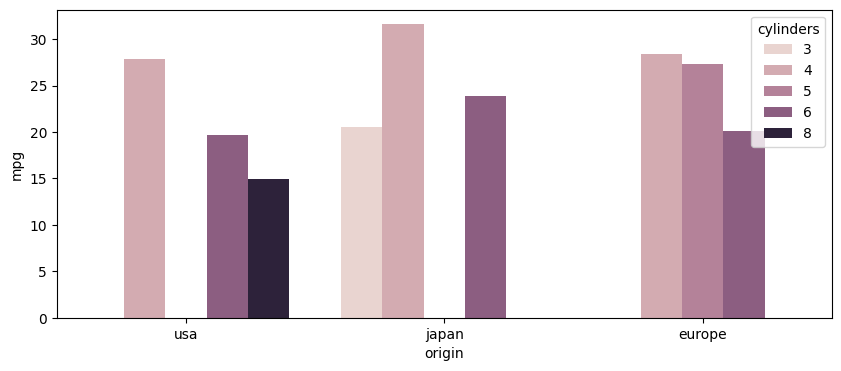

In [ ]:
# cylinders 와 mpg 의 x, hue 값을 변경해서 시각화
plt.figure(figsize=(10,4))
sns.barplot(data=df, x="origin", y="mpg", hue="cylinders",ci=None)

### boxplot과 사분위수

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1280px-Boxplot_vs_PDF.svg.png" width="300">

이미지 출처 : https://en.wikipedia.org/wiki/Box_plot

<Axes: xlabel='origin', ylabel='mpg'>

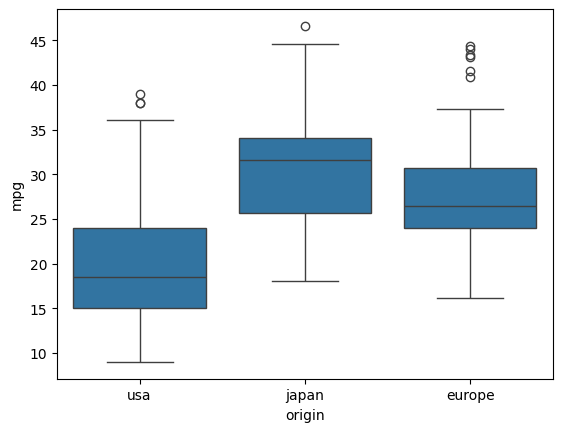

In [ ]:
# boxplot 으로 origin 별 mpg 의 기술통계 값 구하기
sns.boxplot(data=df, x="origin", y="mpg")

In [ ]:
# groupby로 origin 값에 따른 mpg의 기술통계 구하기
# 결과를 변수에 할당하여 재사용하기
origin_desc = df.groupby("origin")["mpg"].describe()
origin_desc

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,70.0,27.891429,6.723930,16.2,24.0,26.5,30.65,44.3
japan,79.0,30.450633,6.090048,18.0,25.7,31.6,34.05,46.6
usa,249.0,20.083534,6.402892,9.0,15.0,18.5,24.00,39.0


### 박스플롯 이해하기
* https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC

In [ ]:
europe = origin_desc.loc["europe"]
europe

,europe
count,70.000000
mean,27.891429
std,6.723930
min,16.200000
25%,24.000000
50%,26.500000
75%,30.650000
max,44.300000


In [ ]:
# IQR, 이상치를 제외한 최댓값, 최솟값 구하기
Q3=europe["75%"]
Q1=europe["25%"]
IQR=Q3-Q1
OUT_MAX=Q3+(1.5*IQR)
OUT_MIN=Q1-(1.5*IQR)
OUT_MAX, OUT_MIN

(np.float64(40.625), np.float64(14.025000000000002))

<Axes: xlabel='origin', ylabel='mpg'>

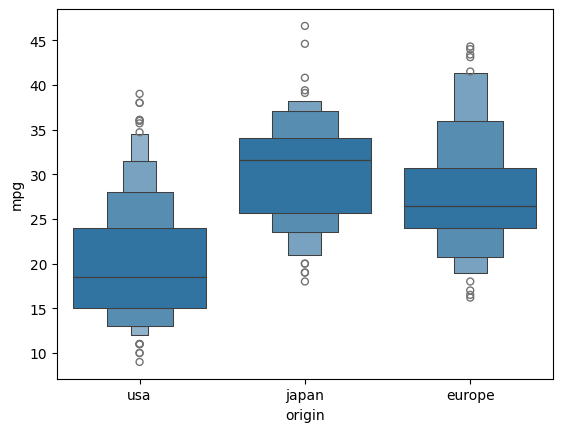

In [ ]:
# boxenplot 그리기
sns.boxenplot(data=df, x="origin", y="mpg")

<Axes: xlabel='origin', ylabel='mpg'>

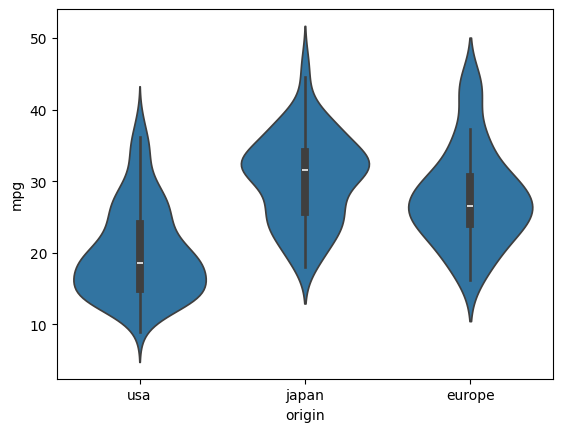

In [ ]:
# violinplot 그리기
sns.violinplot(data=df, x="origin", y="mpg")

### 산점도를 통한 범주형 데이터 표현

<Axes: xlabel='origin', ylabel='mpg'>

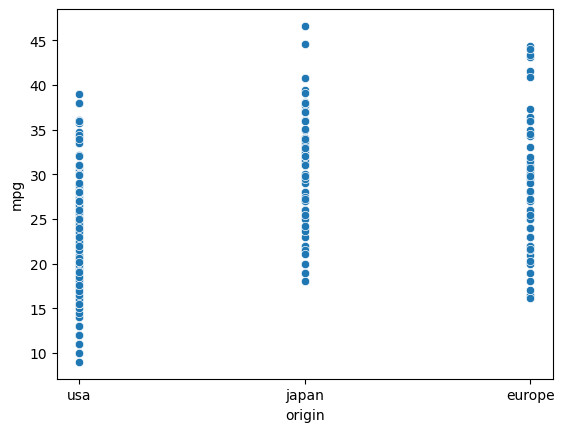

In [ ]:
# scatterplot 으로 범주형 변수 그리기
sns.scatterplot(data=df, x="origin", y="mpg")

<Axes: xlabel='origin', ylabel='mpg'>

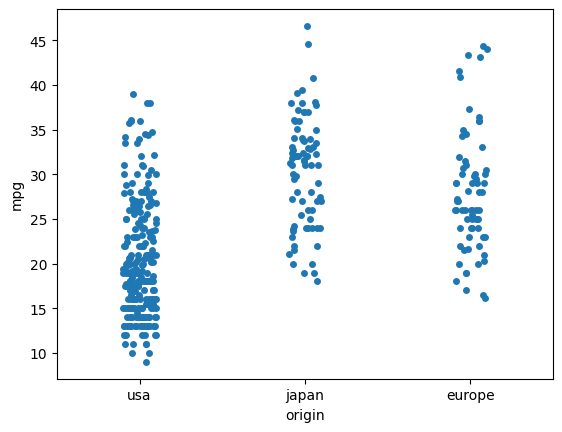

In [ ]:
# stripplot

sns.stripplot(data=df, x="origin", y="mpg")

<Axes: xlabel='origin', ylabel='mpg'>

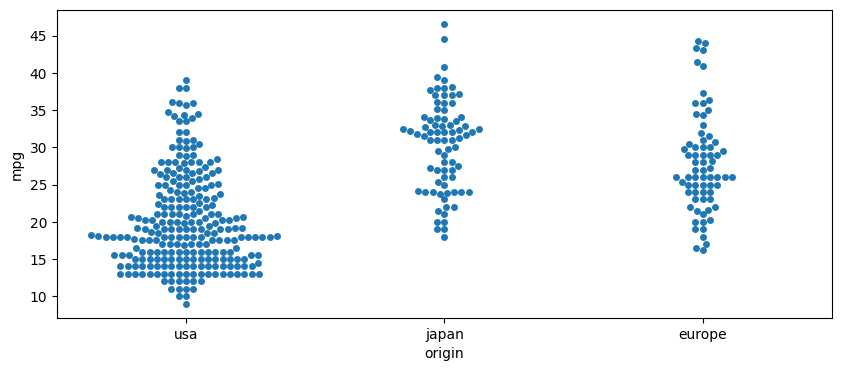

In [ ]:
# swarmplot
plt.figure(figsize=(10,4))
sns.swarmplot(data=df, x="origin", y="mpg")

### catplot을 통한 범주형 데이터의 서브플롯 시각화
<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png" width="500">

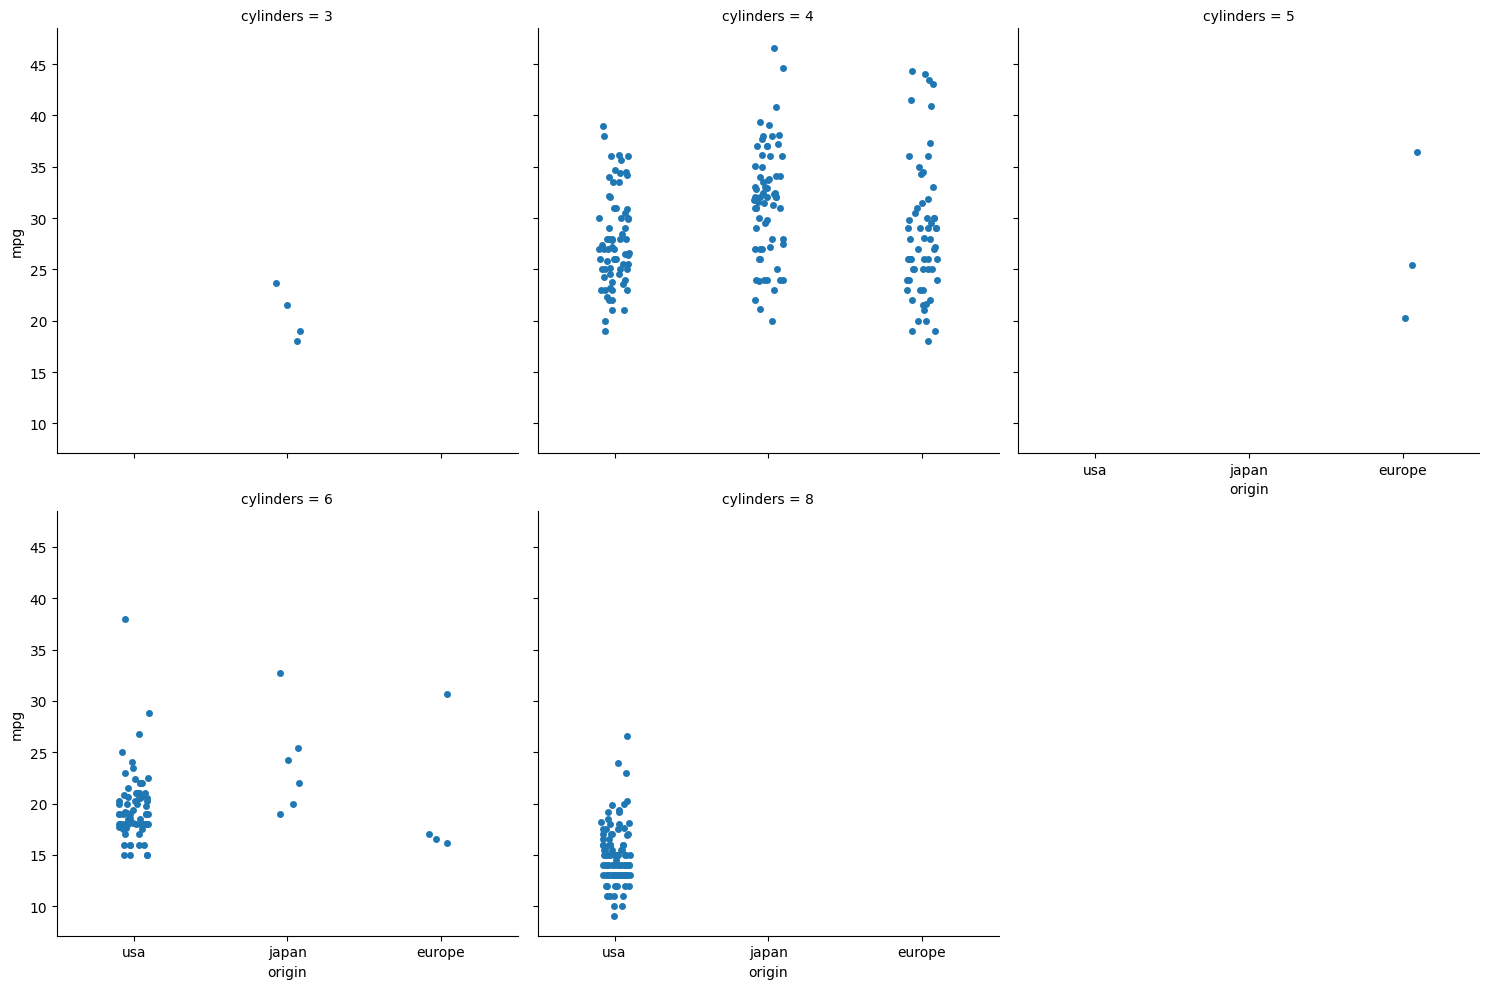

In [ ]:
# catplot
sns.catplot(data=df, x="origin", y="mpg", col="cylinders", col_wrap=3)

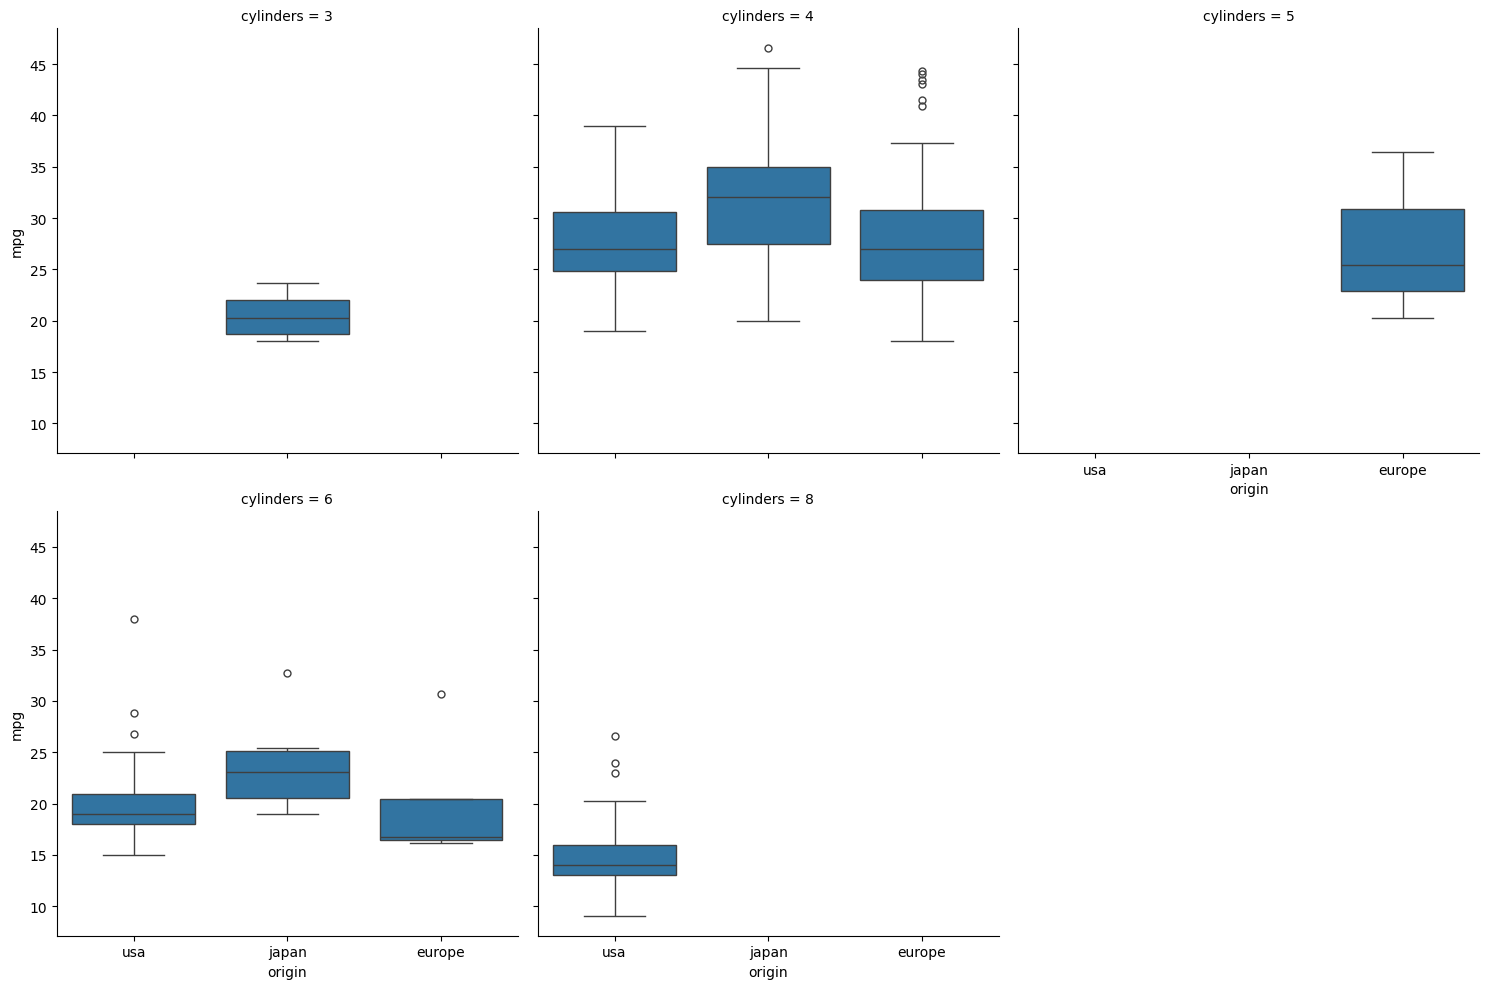

In [ ]:
# catplot 으로 boxplot그리기
sns.catplot(data=df, x="origin", y="mpg", col="cylinders", col_wrap=3, kind="box")

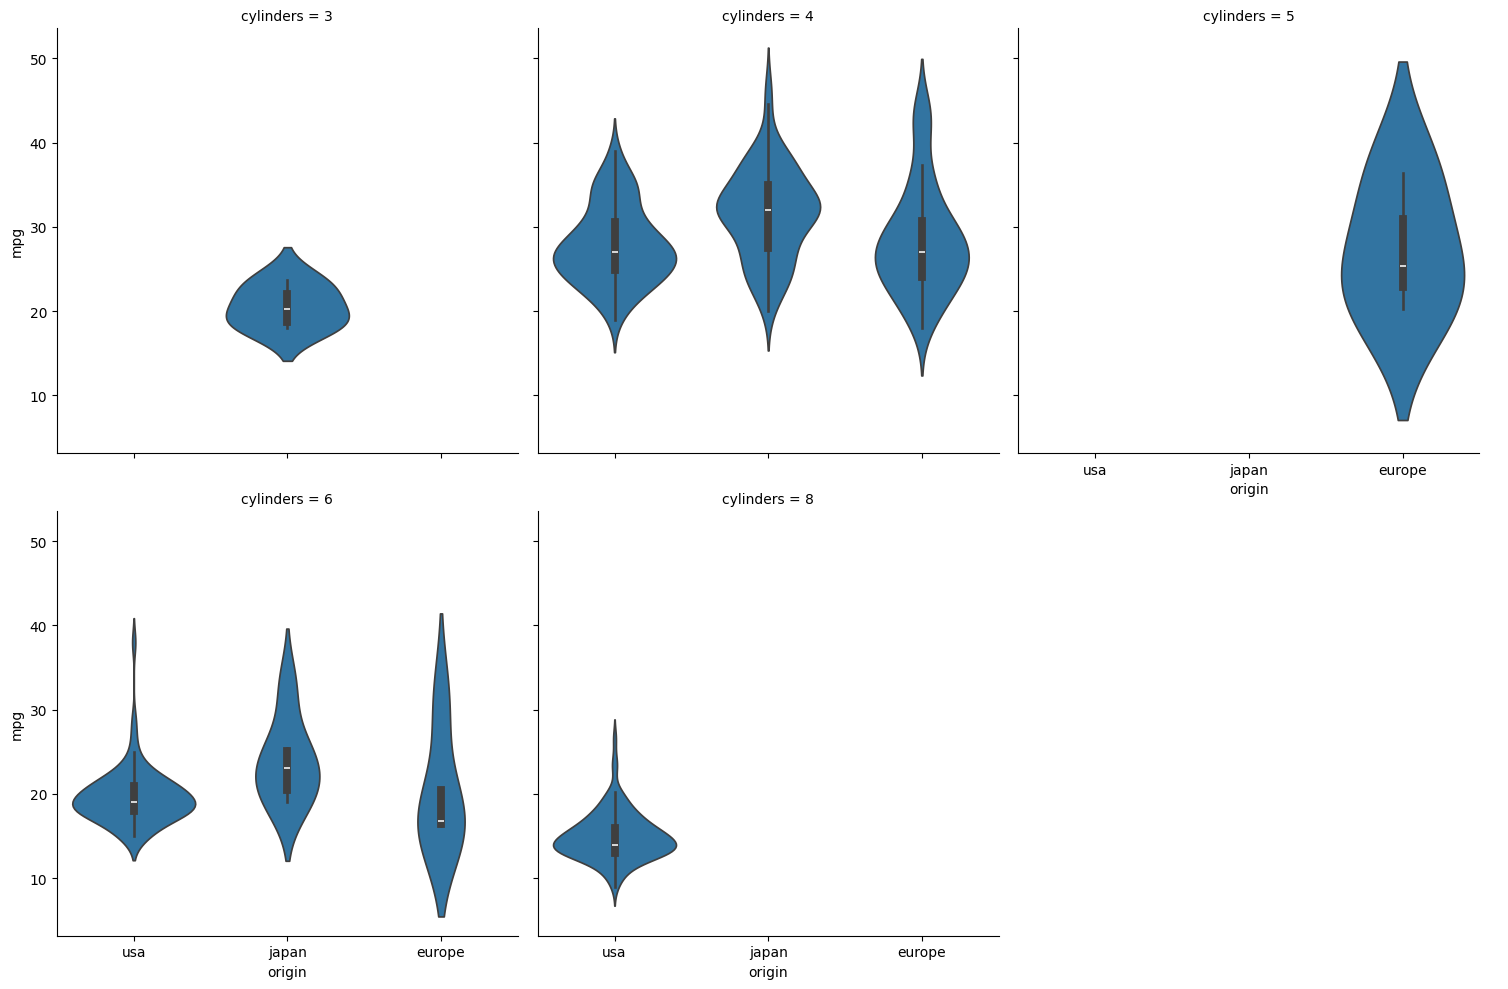

In [ ]:
# catplot 으로 violinplot그리기
sns.catplot(data=df, x="origin", y="mpg", col="cylinders", col_wrap=3, kind="violin")

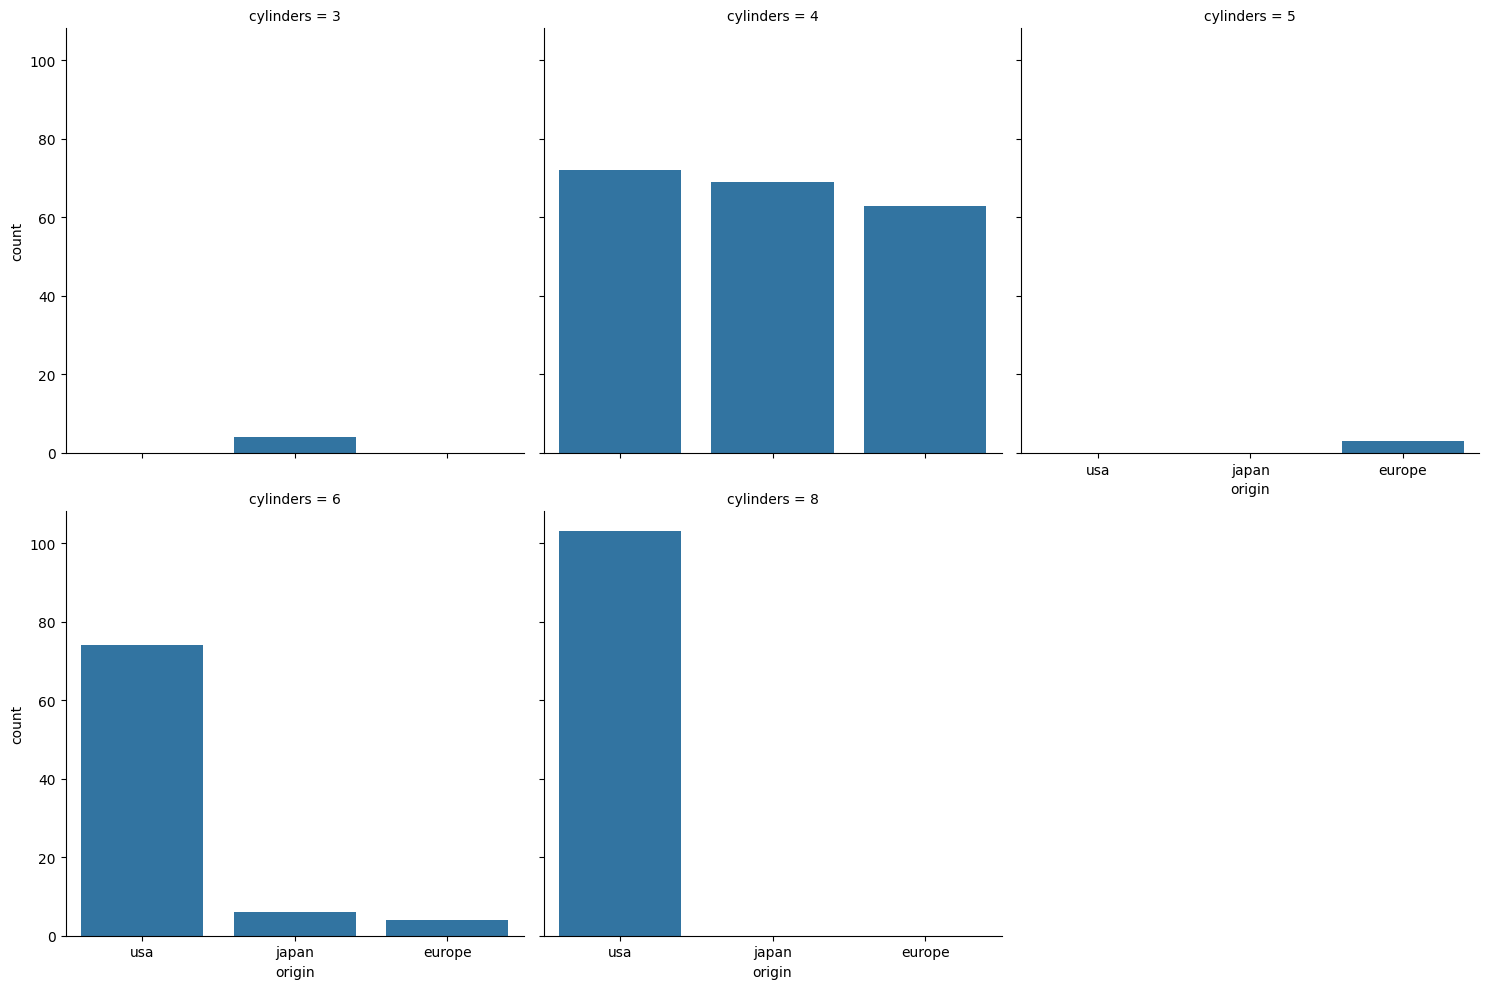

In [ ]:
# catplot 으로 countplot그리기
sns.catplot(data=df, x="origin",col="cylinders", col_wrap=3, kind="count")

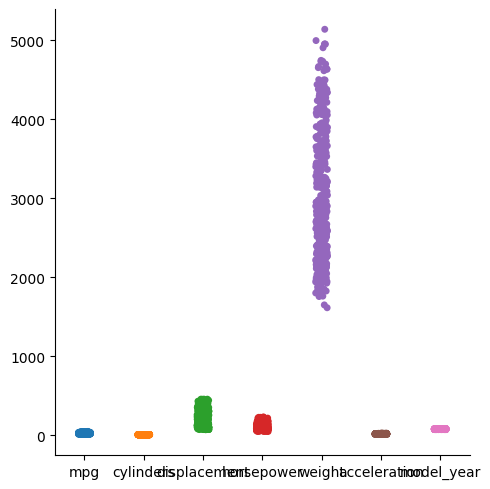

In [ ]:
# catplot 으로 boxplot그리기
# df 전체를 넣고 시각화 하기
sns.catplot(data=df)

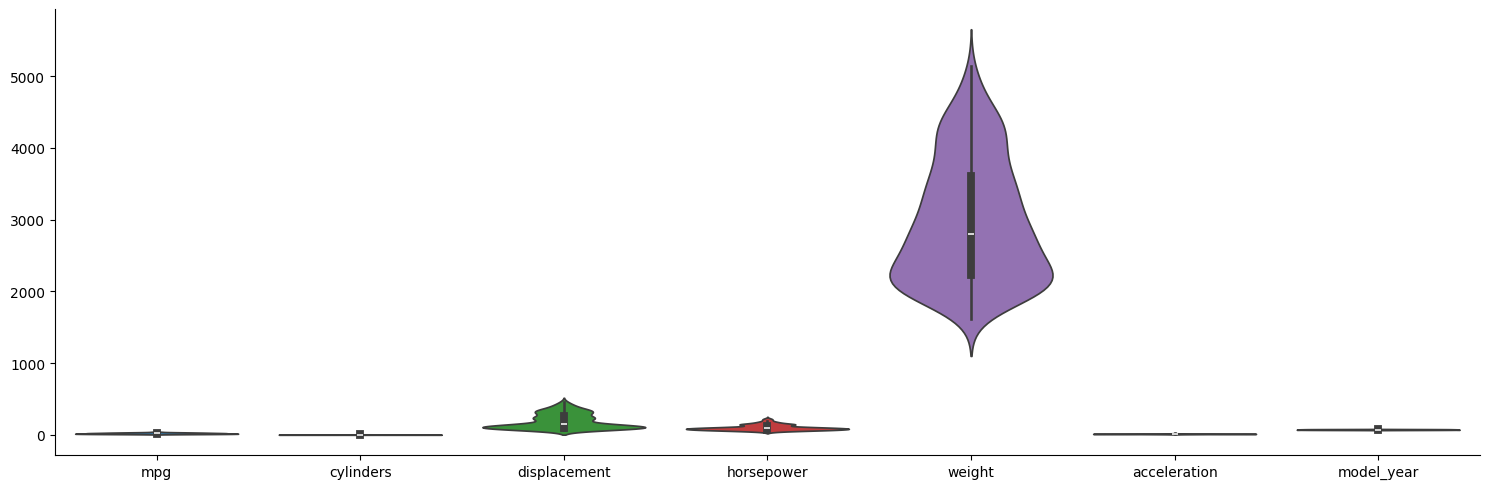

In [ ]:
# catplot 으로 violinplot그리기
# df 전체를 넣고 시각화 하기
sns.catplot(data=df, kind="violin", aspect=3)